# Problem Statement:-

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if we have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

# Data Set-

Size of training set: 5961 records

Size of test set: 1987 records

# Data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("All Libraries are loaded succesfully")

All Libraries are loaded succesfully


In [94]:
df = pd.read_excel("Final_Train.xlsx")
print("Final Training dataset of Doctor Consulation loaded successfully")

Final Training dataset of Doctor Consulation loaded successfully


In [95]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [96]:
df.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


# Label Description-

In [97]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [98]:
df.shape

(5961, 7)

So, there is 5961 rows and 7 columns present in the datsets.

# EDA

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 186.3+ KB


Fess is the only column having int datatype where as all others are categorical(object) datatype.

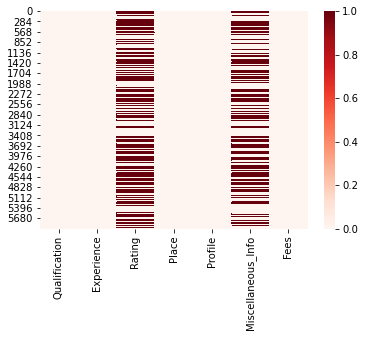

In [100]:
#checking null values using heatmap

sns.heatmap(df.isnull(),cmap='Reds')
plt.show()

In [101]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

So, there is null values are present in two columns i.e, Rating,Miscellaneous_Info & Place.

In [102]:
df.drop('Rating',axis=1,inplace=True)
df.drop('Miscellaneous_Info',axis=1,inplace=True)

Here Rating Column and Miscellaneous_Info has maximum no of Null so I am deleting these Column

In [103]:
df.head()

,Qualification,Experience,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,"Keelkattalai, Chennai",Ayurveda,250


In [104]:
for column in ['Place']:
    df[column].fillna(df[column].mode()[0], inplace=True) 

Filling Null Values with Mode

In [105]:
df.isnull().sum()

Qualification    0
Experience       0
Place            0
Profile          0
Fees             0
dtype: int64

Now no null values are present in the datasets-

In [106]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [107]:
df['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [108]:
df['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [109]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

Here All the values of place are unique So dropping this column too.

In [110]:
df.drop('Place',axis=1,inplace=True)

# Label Encoding Columns-

In [111]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [112]:
from sklearn import preprocessing
for i in df.columns:
    if(len(df[i].value_counts()) == 6):#Profile column
        le_prof = preprocessing.LabelEncoder()
        df[i] = le_prof.fit_transform(df[i])

In [113]:
le=LabelEncoder()
df_qual=le.fit_transform(df['Qualification'])
df_qual

array([ 401,   73, 1135, ...,  596,  943,  243])

In [114]:
df['Qualification']=df_qual

In [115]:
le=LabelEncoder()
df_exp=le.fit_transform(df['Experience'])
df_exp

array([16,  3, 63, ..., 35,  6,  8])

In [116]:
df['Experience']=df_exp

In [117]:
df.head()

,Qualification,Experience,Profile,Fees
0,401,16,5,100
1,73,3,0,350
2,1135,63,3,300
3,464,3,0,250
4,10,12,0,250


# Visualization:-

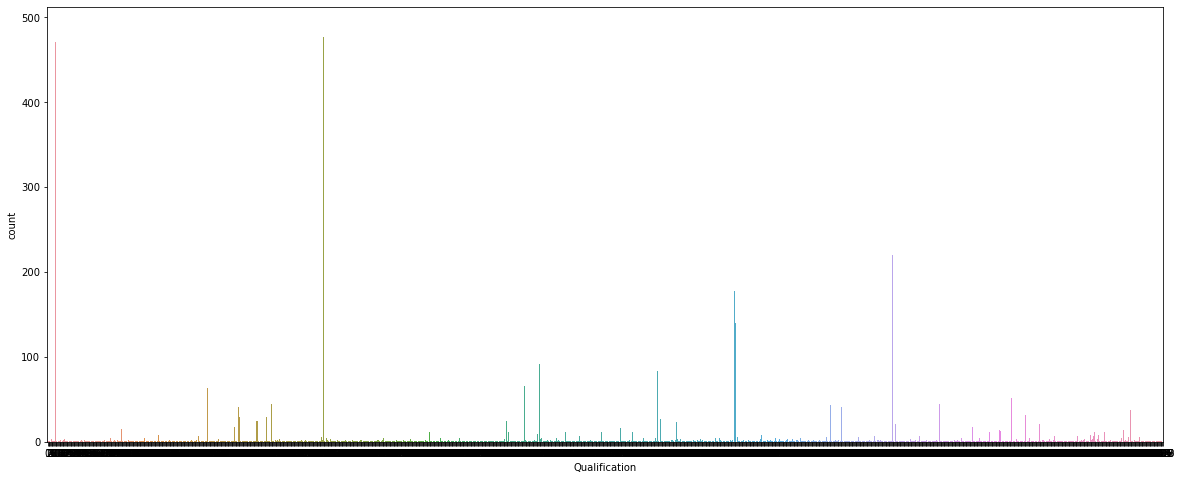

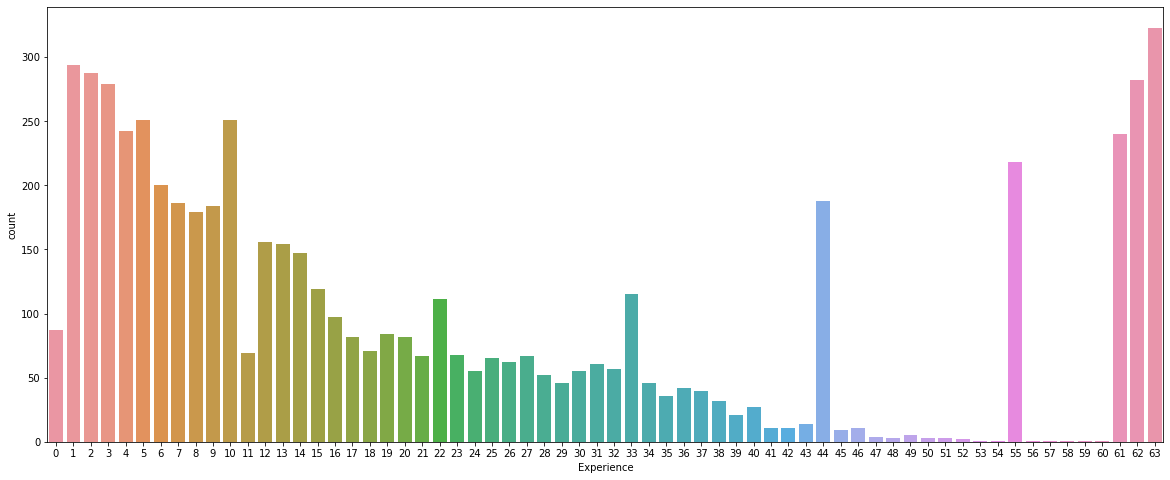

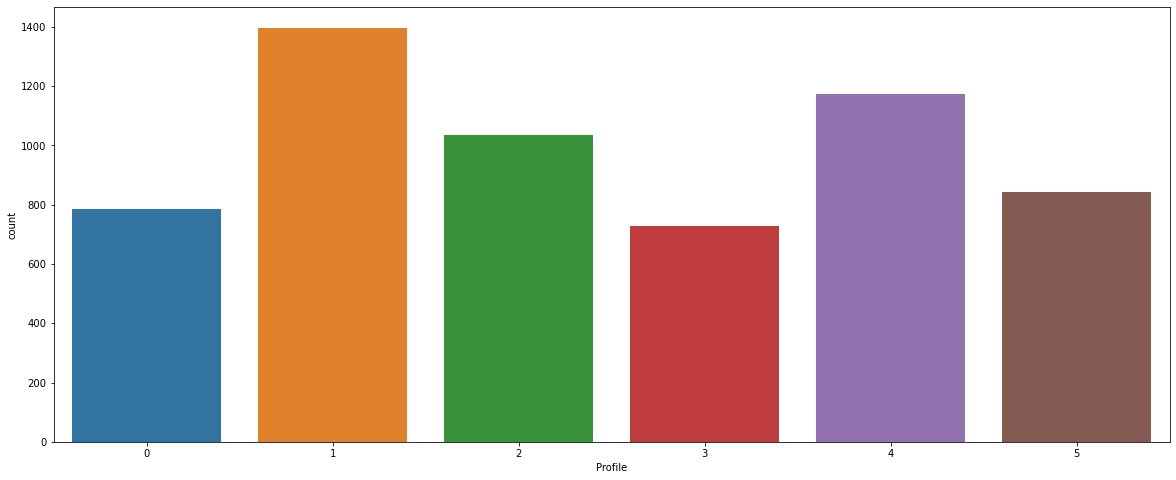

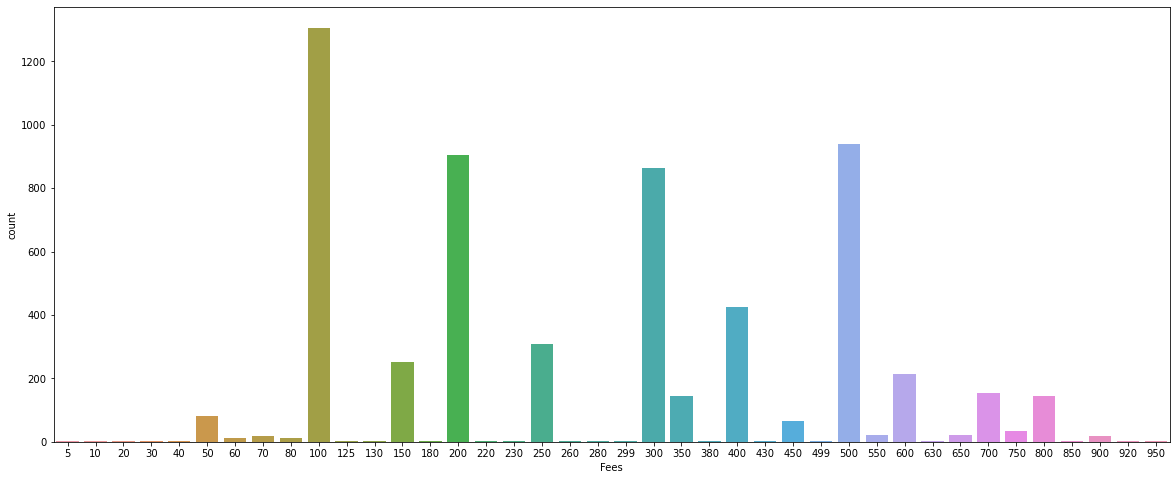

In [118]:
for i in df.columns:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df)
    plt.show()

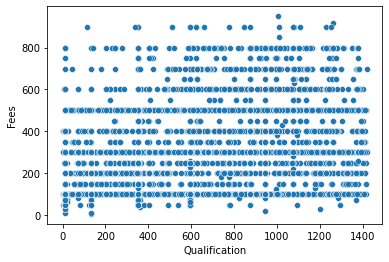

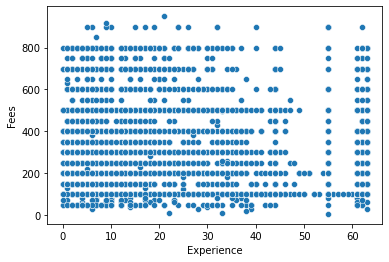

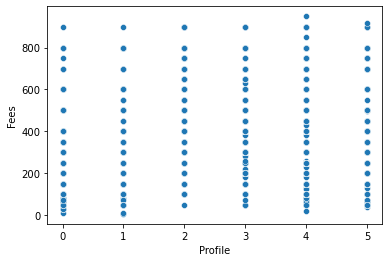

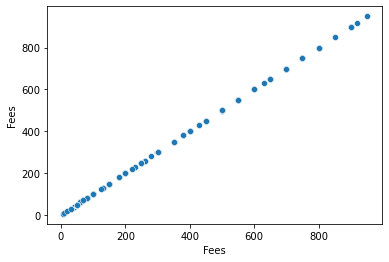

In [119]:
#Cheking  out the relation of features with target variables.
for i in df.columns:
    sns.scatterplot(x=df[i],y=df['Fees'])
    plt.show()

# Correlation

In [120]:
df.corr()

,Qualification,Experience,Profile,Fees
Qualification,1.000000,0.003325,0.393123,0.263214
Experience,0.003325,1.000000,-0.032711,-0.048529
Profile,0.393123,-0.032711,1.000000,0.145226
Fees,0.263214,-0.048529,0.145226,1.000000


"Fees" Least correlation is with experience and highest with qualification.

<AxesSubplot:>

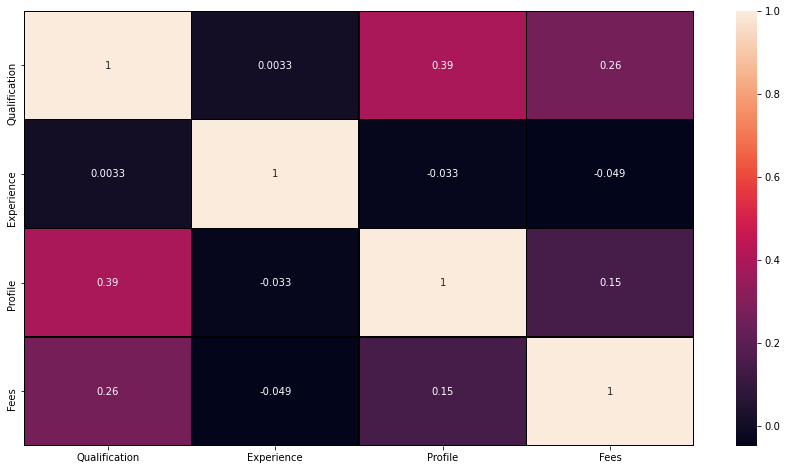

In [121]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black')

# Data Cleaning

# outlier checking

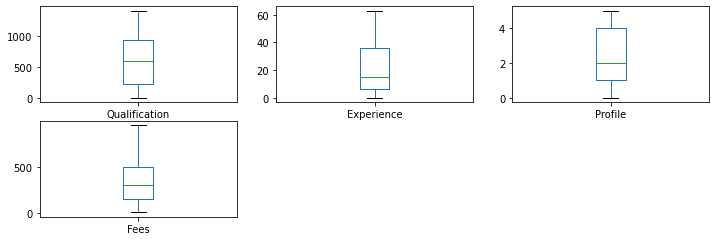

In [122]:
df.plot(kind='box',subplots=True,layout=(12,3),figsize=(12,25))
plt.show()

No as such outliers present in the datset.

# Applying zscore

In [123]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(5961, 4)

In [124]:
threshold=3
print(np.where(z>3))

(array([ 275,  293,  987, 1314, 1631, 2165, 2252, 2393, 2428, 2522, 2623,
       2708, 3365, 4040, 4581, 4730, 4835, 5195, 5250, 5311], dtype=int32), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32))


In [125]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(5961, 4)
(5941, 4)


so we are not going to remove any outliers no as such present.

Now we are going to divide the feature columns and target.

In [126]:
x = df.drop("Fees", axis=1)
y = df["Fees"]

# Checking Skewness

In [127]:
x.skew()

Qualification    0.239720
Experience       0.823531
Profile          0.108803
dtype: float64

# Handling skewness

In [128]:
#Treating the skewness using log
import numpy as np
for i in x.columns:

    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [129]:
x.skew()

Qualification    0.239720
Experience      -0.362028
Profile          0.108803
dtype: float64

# Standard Scalling

In [130]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(x)
x=pd.DataFrame(k,columns = x.columns)

In [131]:
x.head()

,Qualification,Experience,Profile
0,-0.473306,0.124143,1.543016
1,-1.265944,-1.220603,-1.472893
2,1.300465,1.356201,0.336652
3,-0.321061,-1.220603,-1.472893
4,-1.418189,-0.125178,-1.472893


In [132]:
x.shape,y.shape

((5961, 3), (5961,))

# Modelling

In [133]:
#models froms sickit learn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor

#ensemble technique
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [135]:
lr=LinearRegression()
maxr2=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxr2:
        maxr2=r2
        maxrs=i
print('Best r2_score is',maxr2,'on random state', maxrs)

Best r2_score is 0.10240812081204809 on random state 185


In [136]:
#we are splitting data at random satate 185
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=185)

In [137]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4172, 3), (1789, 3), (4172,), (1789,))

In [138]:
LS=Lasso()
RD=Ridge()
KNN=KNeighborsRegressor()
RF=RandomForestRegressor()
ADA=AdaBoostRegressor()

In [139]:
model=[lr,LS,RD,KNN,RF,ADA]

In [140]:
for i in model:
    print('\n')
    print('******************',i,'*******************')
    print('\n')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    pred_t=i.predict(x_train)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('Testing r2_score:',r2_score(y_test,pred))
    print('Training r2_score:',r2_score(y_train,pred_t))
    cvs=cross_val_score(i, x, y, cv=4)
    print('Cross Validation Score:',cvs.mean())



****************** LinearRegression() *******************


score: 0.07020046946414271
mean absolute error: 148.5422930716772
Root mean squared error: 183.19823606409656
Testing r2_score: 0.07739673450535345
Training r2_score: 0.07020046946414271
Cross Validation Score: 0.07178507376828622


****************** Lasso() *******************


score: 0.07013103237841622
mean absolute error: 148.6389478102571
Root mean squared error: 183.22045519212392
Testing r2_score: 0.07717292576517887
Training r2_score: 0.07013103237841622
Cross Validation Score: 0.0717041058317269


****************** Ridge() *******************


score: 0.07020046589938322
mean absolute error: 148.5431691541437
Root mean squared error: 183.198360134349
Testing r2_score: 0.0773954848463908
Training r2_score: 0.07020046589938322
Cross Validation Score: 0.07178512470682696


****************** KNeighborsRegressor() *******************


score: 0.28406424873496183
mean absolute error: 154.69122414756845
Root mean squar

# Random forest refressor is performing good than other models with r2 score of 60%, MAE-152 and RMSE-194.

# Hyper parameter tuning:

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
n_estimators = [50,100, 300, 500]
parameters=dict(n_estimators = n_estimators)

In [143]:
gcv=GridSearchCV(RF,parameters,cv=5)

In [144]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 100, 300, 500]})

In [145]:
#checking the best parameters
gcv.best_params_ 

{'n_estimators': 500}

In [146]:
predgcv=gcv.best_estimator_.predict(x_train)
print('mean absolute error:',mean_absolute_error(y_train,predgcv))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_train,predgcv)))
print('r2_score:',r2_score(y_train,predgcv))

mean absolute error: 90.08873273178123
Root mean squared error: 119.96256379190513
r2_score: 0.6054345302155416


# So, after doing hyper model tunning slighly better r2 score with 61% and mae with 90 & rmse with 119.

# Model Saving

In [147]:
#Saving our model
import joblib
joblib.dump(gcv.best_estimator_,'Doctor_fees_rf.obj')

['Doctor_fees_rf.obj']

# Test Data

# Load data

In [148]:
dft = pd.read_excel('Final_Test.xlsx')
dft.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


# EDA

In [149]:
dft.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

null values are presnt in rating, miscellaneous info & place

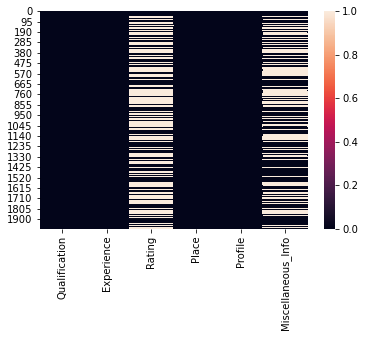

In [150]:
sns.heatmap(dft.isnull())
plt.show()

Converting the Testing Data into the same format like Training Dataset

In [151]:
dft.drop('Rating',axis=1,inplace=True)
dft.drop('Miscellaneous_Info',axis=1,inplace=True)
dft.drop('Place',axis=1,inplace=True)

In [152]:
dft.isnull().sum()

Qualification    0
Experience       0
Profile          0
dtype: int64

In [153]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  1987 non-null   object
 1   Experience     1987 non-null   object
 2   Profile        1987 non-null   object
dtypes: object(3)
memory usage: 23.3+ KB


# Label encoding

In [154]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [155]:
from sklearn import preprocessing
for i in dft.columns:
    if(len(dft[i].value_counts()) == 6):#Profile column
        le_prof = preprocessing.LabelEncoder()
        dft[i] = le_prof.fit_transform(dft[i])

In [156]:
le=LabelEncoder()
dft_qual=le.fit_transform(dft['Qualification'])
dft_qual

array([241, 340, 258, ..., 474,  51, 384])

In [157]:
dft['Qualification']=dft_qual

In [158]:
le=LabelEncoder()
dft_exp=le.fit_transform(dft['Experience'])
dft_exp

array([28, 24, 34, ..., 56,  3, 55])

In [159]:
dft['Experience']=dft_exp

In [160]:
dft.head()

,Qualification,Experience,Profile
0,241,28,4
1,340,24,3
2,258,34,2
3,6,0,0
4,79,7,1


In [161]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Qualification  1987 non-null   int32
 1   Experience     1987 non-null   int32
 2   Profile        1987 non-null   int32
dtypes: int32(3)
memory usage: 23.3 KB


now dtpes is int

# Data Cleaning

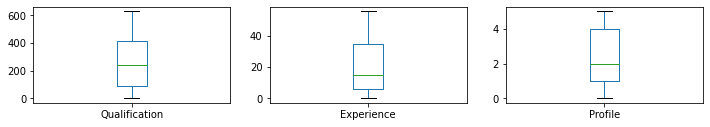

In [162]:
dft.plot(kind='box',subplots=True,layout=(12,3),figsize=(12,25))
plt.show()

# Applying zscore

In [163]:
from scipy.stats import zscore
z=np.abs(zscore(dft))
z.shape

(1987, 3)

In [164]:
threshold=3
print(np.where(z>3))

(array([], dtype=int32), array([], dtype=int32))


In [165]:
dft_new=dft[(z<3).all(axis=1)]
print(dft.shape)
print(dft_new.shape)

(1987, 3)
(1987, 3)


No outliers presnt 

# Skewness

In [166]:
dft.skew()

#Treating the skewness using log
import numpy as np
for i in dft.columns:

    if dft.skew().loc[i]>0.55:
        dft[i]=np.log1p(dft[i])

In [167]:
dft.skew()

Qualification    0.280822
Experience      -0.474469
Profile          0.028926
dtype: float64

Load Test Dataset into Random Forest Model

In [168]:
train_x = dft
pred = RF.predict(train_x)
print(pred)

[272.5 272.5 272.5 ... 272.5 210.  272.5]


In [169]:
dft_b = pd.DataFrame(pred)

In [170]:
dft_b

,0
0,272.500000
1,272.500000
2,272.500000
3,408.166667
4,210.000000
...,...
1982,239.716667
1983,272.500000
1984,272.500000
1985,210.000000


In [171]:
#importing the model
fees=joblib.load('Doctor_fees_rf.obj')

In [172]:
x=fees.predict(dft)

In [173]:
x

array([259. , 259. , 259. , ..., 259. , 191.7, 259. ])

In [174]:
dft_a = pd.DataFrame(x)

In [175]:
dft_a

,0
0,259.000000
1,259.000000
2,259.000000
3,421.204762
4,191.700000
...,...
1982,235.410000
1983,259.000000
1984,259.000000
1985,191.700000


In [176]:
#Saving the result to excel file
dft_a.to_excel('Fees.xlsx', index=False)

In [177]:
F=pd.read_excel('Fees.xlsx')

In [178]:
F

,0
0,259.000000
1,259.000000
2,259.000000
3,421.204762
4,191.700000
...,...
1982,235.410000
1983,259.000000
1984,259.000000
1985,191.700000


In [180]:
print("Predicted value",dft_a[5:10])
print("Actual_price",dft_b[5:10])

Predicted value             0
5  191.700000
6  259.000000
7  191.700000
8  223.635556
9  259.000000
Actual_price        0
5  210.0
6  272.5
7  210.0
8  225.0
9  272.5


# Completed